## Classifying movie reviews: a binary classification example

Neste exemplo, aprenderemos a classificar as críticas de filmes em críticas "positivas" e críticas "negativas", apenas com base no conteúdo do texto das críticas.

**The IMDB dataset**

Datset com 50.000 comentários polarizadas de filmes da Internet. Eles são divididos em 25000 e 25000, cada conjunto consistindo em 50% de comentários negativos e 50% positivos.

O IMDB vem empacotado com Keras e já foi pré-processado: as resenhas (sequências de palavras) foram transformadas em sequências de inteiros, onde cada inteiro representa uma palavra específica em um dicionário.


In [1]:
""" O argumento num_words = 10000 significa que manteremos apenas as 10.000 
    palavras mais frequentes nos dados de treinamento. 
    
    Palavras raras serão descartadas. 
    
    Isso nos permite trabalhar com dados vetoriais de tamanho gerenciável.
"""

import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000,
                                                                      start_char=1,
                                                                      oov_char=2,
                                                                      index_from=3)

""" As variáveis train_data e test_data são listas de revisões, 
    cada revisão sendo uma lista de índices de palavras 
    (codificando uma sequência de palavras). 
    
    train_labels e test_labels são listas de 0s e 1s, em que 
    0 significa negativo e 1 significa positivo
"""

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels[0]

1

In [5]:
# Como nos restringimos às 10.000 palavras mais frequentes, 
# nenhum índice de palavras excederá 10.000
max([max(sequence) for sequence in train_data])

9999

Podemos decodificar rapidamente um desses comentários para palavras em inglês

In [ ]:
# word_index é um dicionário que mapeia palavras para um índice inteiro
word_index = imdb.get_word_index()

# # Podemos inverté-lo, mapeando índices inteiros para palavras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# # Decodificamos a revisão; observe que nossos índices foram deslocados por 3
# # porque 0, 1 e 2 são índices reservados para "padding", "start of sequence" 
# # e "unknown". O índice 3 nunca éé utilizado.
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
print(len(decoded_review.split(' ') ))

218


## Preparando os dados

Vamos codificar nossas listas em vetores de 0s e 1s. Concretamente, isso significaria, por exemplo, transformar a sequência [3, 5] em um vetor de 10.000 dimensões que seriam todos zeros exceto para os índices 3 e 5, que seriam uns. 

Então poderíamos usar como primeira camada em nossa rede uma camada Densa, capaz de lidar com dados vetoriais de ponto flutuante.

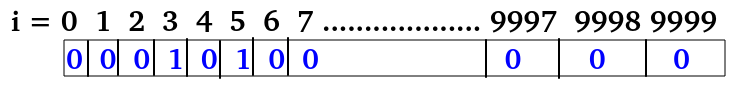

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # print(sequence)
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
# vamos vetorizar os rótulos
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Construindo nossa rede

Nossos dados de entrada são simplesmente vetores, e nossos rótulos são escalares (1s e 0s). Um tipo de rede apropriada seria uma pilha de camadas densas com ativações relu, por exemplo: Densa(16, ativação = 'relu')

Cada camada Densa com uma ativação relu implementa a seguinte cadeia de operações tensoriais:

output = relu(dot(W, input) + b)

Ter 16 unidades ocultas significa que a matriz de peso W terá forma (dimensão_entrada, 16), ou seja, o produto escalar com W projetará os dados de entrada em um espaço de representação de 16 dimensões

Ter mais unidades ocultas (um espaço de representação de dimensão superior) permite que sua rede aprenda representações mais complexas, mas torna sua rede mais cara computacionalmente e pode levar ao overfitting.

1. Quantas camadas usar?
2. Quantas "unidades ocultas" escolher para cada camada?

Esta é a aparência de nossa rede:

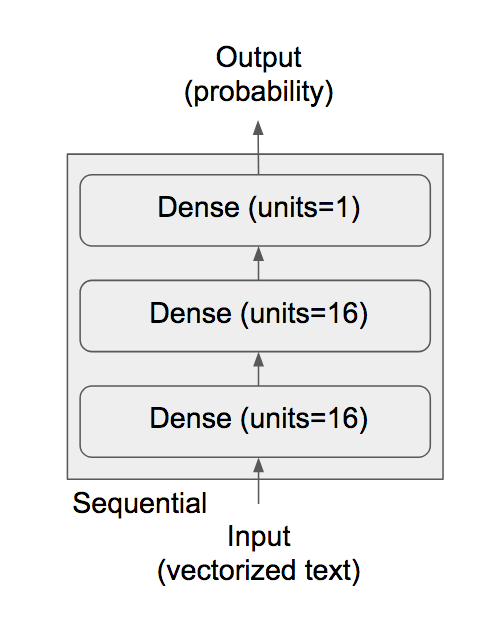

In [ ]:
from keras.models import Model
from keras import losses
from keras import metrics
from keras.layers import Input, Dense

visible = Input(shape=(10000,))
h = Dense(16, activation='relu')(visible)
h = Dense(16, activation='relu')(h)
saida = Dense(1, activation='sigmoid')(h)

model = Model(inputs=[visible], outputs=[saida])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Binary Cross-Entropy

Função de perda utilizada em problemas de classificação binária, onde $\text{Classes} = \{ C_1, C_2\}$

A Entropia Cruzada binária é definida como:

$CE = - \sum_{i=1}^{2} t_{i} \log (s_{i}) = -t_{1} \log (s_{1}) - (1 - t_{1}) \log (1 - s_{1})$

onde é $s_i$ é a saída de um neurónio sigmoid, e $t_1$ e $t_2$ são os rótulos.

In [ ]:
np.log([0.1, 0.2, 0.3, 0.9, 1])

array([-2.30258509, -1.60943791, -1.2039728 , -0.10536052,  0.        ])

## Validando nossa abordagem

Para monitorar durante o treinamento a acuracia do modelo nos dados que ele nunca viu antes, criaremos um "conjunto de validação" separando 10.000 amostras dos dados de treinamento originais:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Treinamento

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5598 - accuracy: 0.7725 - val_loss: 0.4153 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3154 - accuracy: 0.8985 - val_loss: 0.3066 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2165 - accuracy: 0.9295 - val_loss: 0.2783 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1650 - accuracy: 0.9475 - val_loss: 0.2798 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1274 - accuracy: 0.9639 - val_loss: 0.2873 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1014 - accuracy: 0.9726 - val_loss: 0.3055 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0814 - accuracy: 0.9805 - val_loss: 0.3239 - val_accuracy: 0.8819
Epoch 8/20
30

## Graficos de treinamento

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

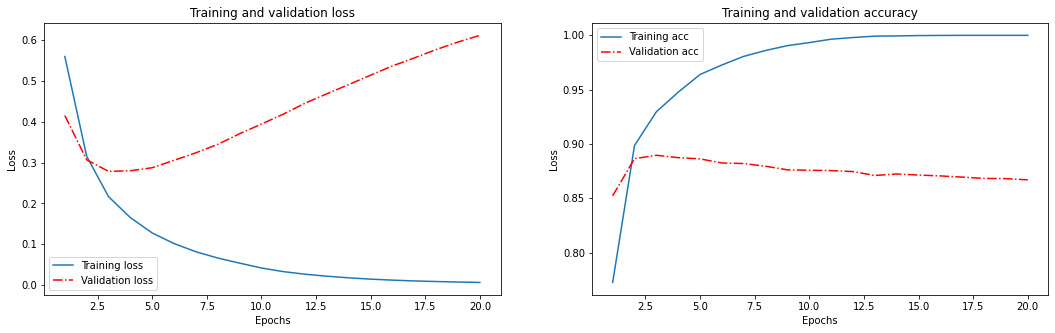

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, '-.r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, '-.r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Overfitting

Para evitar overfitting, poderíamos simplesmente interromper o treinamento após três épocas. 

Em geral, há uma variedade de técnicas que podemos utilizar para mitigar o sobreajuste.

Vamos treinar uma nova rede do zero por quatro épocas e, em seguida, avaliar os dados de teste

In [ ]:
v = Input(shape=(10000,))
h = Dense(16, activation='relu')(v)
h = Dense(16, activation='relu')(h)
s = Dense(1, activation='sigmoid')(h)

model2 = Model(inputs=[v], outputs=[s] )

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=5,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 54ms/step - loss: 0.5540 - accuracy: 0.7784 - val_loss: 0.3988 - val_accuracy: 0.8587
Epoch 2/5
30/30 [==============================] - 1s 43ms/step - loss: 0.2962 - accuracy: 0.9013 - val_loss: 0.2907 - val_accuracy: 0.8885
Epoch 3/5
30/30 [==============================] - 1s 43ms/step - loss: 0.1945 - accuracy: 0.9358 - val_loss: 0.2757 - val_accuracy: 0.8903
Epoch 4/5
30/30 [==============================] - 1s 43ms/step - loss: 0.1416 - accuracy: 0.9560 - val_loss: 0.2843 - val_accuracy: 0.8859
Epoch 5/5
30/30 [==============================] - 1s 39ms/step - loss: 0.1073 - accuracy: 0.9710 - val_loss: 0.3035 - val_accuracy: 0.8843


In [ ]:
results1 = model.evaluate(x_test,  y_test)
results1

782/782 [==============================] - 2s 2ms/step - loss: 0.9426 - accuracy: 0.8496


[0.9426481127738953, 0.849560022354126]

In [ ]:
results2 = model2.evaluate(x_test,  y_test)
results2

782/782 [==============================] - 2s 2ms/step - loss: 0.3250 - accuracy: 0.8737


[0.3249896764755249, 0.8736799955368042]

## Predit

Usando uma rede treinada para gerar previsões sobre novos dados

In [ ]:
model2.predict(x_test)

array([[0.23478085],
       [0.9998151 ],
       [0.9281206 ],
       ...,
       [0.04702857],
       [0.07964551],
       [0.7389285 ]], dtype=float32)